In [ ]:
import os, nltk, glob
import pandas as pd
from docx import Document

# Feature Extraction

In [ ]:
import pandas as pd
import re 
import spacy 
import os 
import numpy as np

In [ ]:
!pwd

In [ ]:
# Read CSV files
resume_info = pd.read_csv('../../data/input/feature_extraction/manual_extraction_template.csv')
retailers_df = pd.read_csv('../../data/input/feature_extraction/retail_list.csv')
restaurant_df = pd.read_csv('../../data/input/feature_extraction/food_retail_list.csv')
supermarket_df = pd.read_csv('../../data/input/feature_extraction/supermarket_retail_list.csv')
companies_df = pd.read_csv('../../data/input/feature_extraction/resume_companies.csv')


In [ ]:
restaurant_df.head()

In [ ]:
#retailers_df.describe()

In [ ]:
#companies_df.describe()

In [ ]:
# Cleaning

# Remove empty lines
retailers_df = retailers_df.dropna()
companies_df = companies_df.dropna()
# Remove duplicates
retailers_df = retailers_df.drop_duplicates(subset=None, keep='first', inplace=False) 
companies_df = companies_df.drop_duplicates(subset=None, keep='first', inplace=False)
# Reset_Index
retailers_df = retailers_df.reset_index().drop('index',1)
#.drop('index',1)
companies_df = companies_df.reset_index().drop('index',1)

In [ ]:
# Step 0 Clean Text function
def clean_c_name(text):
    
    text = str(text.split('/')[0])
    text = str(text.split(',')[0])
    #text = str(text.split('(')[0])
    
    # Replace a sequence of whitespaces by a single whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove other strange characters
    text = re.sub(r'''[\*\~]+''', "", text)
    
    # Remove '.' from last place
    if text.endswith('.'):
        text= text[:-1]
    
    text_out = text
    
    return text_out 

In [ ]:
# STEP_1 Prepare df function
def prepare_df(df, col_name_out ='retail_new_name', col_name_in ='retail_name'):
    '''
    '''
    
    # Remove empty lines
    df = df.dropna()
    
    # Remove duplicates
    df = df.drop_duplicates(subset=None, keep='first', inplace=False)
    
    # Reset_Index
    df = df.reset_index().drop('index',1)
    
    # Clean names
    df[col_name_out] = df[col_name_in].apply(clean_c_name)
    df[col_name_out] = df[col_name_out].str.strip().str.lower().str.replace('(', '').str.replace(')', '').str.replace(',','')
    
    # Sort df
    df.sort_values(by=[col_name_in], ascending=True)
    
    return df 
    

In [ ]:
test_retail_df = prepare_df(restaurant_df,'rest_name', 'restaurant_retailers')
test_retail_df

In [ ]:
#retailers_df['retail_name'].to_list()

In [ ]:
#companies_df

In [ ]:
#"Glentel/ Wireless ETC".split('/')

In [ ]:
#"Indian Health Consultant, Delhi, India".split(',')[0]

In [ ]:
companies_df['company_1'] = companies_df['company'].apply(clean_c_name)
companies_df['company_1'] = companies_df['company_1'].str.strip().str.lower().str.replace('(', '').str.replace(')', '')
companies_df['company_1'].to_list()

In [ ]:
#companies_df.columns = companies_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
# #!python -m spacy download en_core_web_sm
# nlp = spacy.load("en_core_web_sm")

In [ ]:
# def preprocess(text, min_token_len = 3, 
#                irrelevant_pos = ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE']):
#     try:
#         text = re.sub(r'([\t]+)', ' ', text)
        
#         text = str(text.split('/')[0])
#         text = str(text.split(',')[0])
#         #text = str(text.split('(')[0])

#         # Replace a sequence of whitespaces by a single whitespace
#         text = re.sub(r'\s+', ' ', text)

#         # Remove other strange characters
#         text = re.sub(r'''[\*\~]+''', "", text)

#         doc = nlp(text)
        
#         result = ' '.join([token.lemma_ for token in doc 
#                       if token.is_stop == False
#                           and token.pos_ not in irrelevant_pos 
#                           and token.is_alpha 
#                           #and not token.like_url 
#                           #and not token.like_email 
#                           #and not token.is_stop
#                           #and not token.text.isupper()
#                           #and not token.text.isdigit()
#                           and not token.is_punct
#                           and len(token) >= min_token_len])
#     except TypeError:
#         return("no resume found")
#     return result

In [ ]:
# companies_df['company_2'] = companies_df['company'].apply(preprocess)
# companies_df['company_2'] = companies_df['company_2'].str.lower()
# #companies_df#['company_2'].to_list()

In [ ]:
companies_df.sort_values(by=['company'], ascending=True)#['company_2'].to_list()

In [ ]:
retailers_df['retailer_1'] = retailers_df['retail_name'].apply(clean_c_name)
retailers_df['retailer_1'] = retailers_df['retail_name'].str.strip().str.lower().str.replace('(', '').str.replace(')', '').str.replace(',','')
retailers_df['retailer_1'].to_list()

In [ ]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)  

In [ ]:
retailers_df.sort_values(by=['retail_name'], ascending=True)

In [ ]:
retailers_df.loc[retailers_df['retailer_1']=='mcdonald']

 # Similarity Algorithms

## 1 Levenstein distance (Source:https://en.wikipedia.org/wiki/Levenshtein_distance)

In [ ]:
#pip install python-Levenshtein
#pip install textdistance
import Levenshtein
import textdistance

In [ ]:
textdistance.levenshtein.normalized_similarity('ontario ventilation company','ontario ventilation company')

In [ ]:
#companies_df['company_1'].to_list()

In [ ]:
#from collections import defaultdict

# inputs

company_list = companies_df['company_1'].to_list()
reference_list = retailers_df['retailer_1'].to_list()


compare_dict = {}
pairs = []

for company in company_list[0:5]:
# for company in company_list:
    
    similar_dict = {}
    compare_dict.setdefault(company,[]).append(similar_dict)
    
    for retailer in retailers_df['retailer_1'][0:5]:
#     for retailer in reference_list:  
        
        pair = (company,retailer)
        pairs.append(pair)
        
# Calculate similarity - Levenshtein Distance - also know as edit distance 
# The return value is a float between 0 and 1, where 0 means totally different, and 1 equal.
        
        similarity = textdistance.levenshtein.normalized_similarity(company, retailer)
        
        similar_dict.setdefault(retailer,[]).append(similarity)
        
# Get the most similar (maximum similarity index)
most_similar_dict={}
        
for company, compare in compare_dict.items():
    
    most_similar = [{k:round(v[0],4)} for k,v in compare[0].items() if v==max(compare[0].values())][0]
#    print(most_similar)
# This way stopped working :(
#     ms_retailer = list(most_similar.keys())[0]
#     ms_retail_index = list(most_similar.values())[0]

    [[ms_retailer, ms_retail_index]] = most_similar.items()
    

    most_similar_dict.setdefault("company",[]).append(company)
    most_similar_dict.setdefault("ms_retailer",[]).append(ms_retailer)
    most_similar_dict.setdefault("ms_retail_index",[]).append(ms_retail_index)
    
# Calculate retail flag
    if ms_retail_index > 0.7:
        retail_flag = 1
    else:
        retail_flag = 0
        
    most_similar_dict.setdefault("retail_flag",[]).append(retail_flag)

# Results
similar_retail_df = pd.DataFrame(most_similar_dict)
# similar_retail_df.sort_values(by=['ms_retail_index'], ascending=False) 

In [ ]:
# from platform import python_version
# print(python_version())

In [ ]:
# import sys
# sys.executable

In [ ]:
# most_similar = {'alife rivington club': 0.25}
# #type(most_similar)
# [[ms_retailer,v]] = most_similar.items()
# ms_retailer


In [ ]:
# company_list = companies_df['company_1'].to_list()
# type(company_list)

In [ ]:
# Compare companies list to list and generate similarity index and flag based on cutoff

def gen_flag(input_list, ref_list, out_name = 'ms_retailer', flag_name = 'f_retail', threshold = 0.7):
    '''
    '''
    
    # Check inputs are ok for processing
    
    if type(input_list) == 'pandas.core.series.Series':
        input_list = input_list.to_list()
        
    if type(input_list) == 'list':
        input_list = input_list
    
    if type(ref_list) == 'pandas.core.series.Series':
        input_list = input_list.to_list()
        
    if type(ref_list) == 'list':
        input_list = input_list
    
    compare_dict = {}
    pairs = []

    # for company in input_list[0:5]:
    for company in input_list:

        similar_dict = {}
        compare_dict.setdefault(company,[]).append(similar_dict)

    #     for retailer in ref_list[0:5]:
        for retailer in ref_list:  

            pair = (company,retailer)
            pairs.append(pair)

    # Calculate similarity - Levenshtein Distance - also know as edit distance 
    # The return value is a float between 0 and 1, where 0 means totally different, and 1 equal.

            similarity = textdistance.levenshtein.normalized_similarity(company, retailer)

            similar_dict.setdefault(retailer,[]).append(similarity)

    # Get the most similar (maximum similarity index)
    most_similar_dict={}

    for company, compare in compare_dict.items():

        most_similar = [{k:round(v[0],4)} for k,v in compare[0].items() if v==max(compare[0].values())][0]
        
        [[ms_retailer, ms_retail_index]] = most_similar.items()

        most_similar_dict.setdefault("company",[]).append(company)
        most_similar_dict.setdefault(out_name,[]).append(ms_retailer)
        most_similar_dict.setdefault("ms_index",[]).append(ms_retail_index)

    # Calculate retail flag
        if ms_retail_index >= threshold:
            retail_flag = int(1)
        else:
            retail_flag = int(0)

        most_similar_dict.setdefault(flag_name,[]).append(retail_flag)

    # Results
    similar_df = pd.DataFrame(most_similar_dict)
    
    return similar_df


In [ ]:
# General Retail experience flag
similar_retail_df = gen_flag(companies_df['company_1'], retailers_df['retailer_1'], 'ms_retailer', 'retailer_flag')

In [ ]:
similar_retail_df.sort_values(by=['ms_index'], ascending=False).head(20)

In [ ]:
similar_retail_df.sort_values(by=['company'], ascending=False)

## 1 Food-Convenience-Pharmacy Retailers

In [ ]:
# 1 load list of Food Retailers
supermarket_df = pd.read_csv('../../data/input/feature_extraction/supermarket_retail_list.csv')

In [ ]:
supermarket_df.head(5)

In [ ]:
fcp_list = supermarket_df['Supermarket_retailers'].to_list() + food_conv_pharm_list

In [ ]:
# 2 Clean data frame for comparison
#def prepare_df(df, col_name_out ='retail_new_name', col_name_in ='retail_name'):
supermkt_df = prepare_df(supermarket_df, col_name_out ='supermkt_retailer', col_name_in ='Supermarket_retailers')
supermkt_df

In [ ]:
# 3 Generate Supermarket Retail flag 
similar_supermkt_df = gen_flag(companies_df['company_1'], 
                            supermkt_df['supermkt_retailer'], 
                            out_name = 'ms_retailer', 
                            flag_name = 'supermkt', 
                            threshold = 0.85)

In [ ]:
# Inspect resutls by index
similar_supermkt_df.sort_values(by=['ms_index'], ascending=False).head(20)

In [ ]:
# Number of supermarket realted jobs
smkt_jobs = (similar_supermkt_df.supermkt == 1).sum()
total_jobs = similar_supermkt_df.shape[0]
smkt_jobs_ratio = round(smkt_jobs/total_jobs*100,3)
print ("supermarket realted jobs", smkt_jobs,"(",smkt_jobs_ratio,"%",")")

In [ ]:
# Inspect resutls by name
similar_supermkt_df.sort_values(by=['company'], ascending=True)

In [ ]:
# Explore df for key words
similar_supermkt_df[similar_supermkt_df['company'].str.contains('drug')]

In [ ]:
# List of convenience stores (https://en.wikipedia.org/wiki/List_of_convenience_stores & https://en.wikipedia.org/wiki/List_of_Canadian_stores)
convenience_store_list = [
"Aisle 24", 
"Avondale Stores", 
"Circke K", 
"Couche-Tard",
"Provi-Soir",
"Hasty Market",
"Irving Blue Canoe",
"Irving Mainway",
"Needs Convenience",
"OLCO",
"On the Run",
"Pioneer",
"Quickie Convenience Stores",
"7-Eleven",
"Becker's",
"Mac's Convenience Stores", 
"Dollarama"]

In [ ]:
# Clean Convenience store list
convenience_store_df = pd.DataFrame({"convenience_store":convenience_store_list})
convenience_df = prepare_df(convenience_store_df, col_name_out ='convenience_retailer', 
                            col_name_in ='convenience_store')
convenience_retail_list = convenience_df['convenience_retailer'].to_list()
# convenience_retail_list

In [ ]:
# Final list to be edited 
convenience_retail_list = [
'aisle 24',
'avondale stores',
'circke k',
'couche-tard',
'provi-soir',
'hasty market',
'irving blue canoe',
'irving mainway',
'needs convenience',
'olco',
'on the run',
'pioneer',
'quickie convenience stores',
'7-eleven',
"becker's",
"mac's convenience stores",
'dollarama', 
"mac’s convenience store calgary"]

In [ ]:
food_producer = ["aliyas foods ltd."]

In [ ]:
government = ["agriculture and agri-food canada"]

In [ ]:
#add_restaurant_list = ["tucker's market place", "bier markt", "blco foods"]

In [ ]:
marketing_list = similar_supermkt_df[similar_supermkt_df['company'].str.contains('marketing')]['company'].to_list()

In [ ]:
# Explore dataframe for words
supermkt_df[supermkt_df['supermkt_retailer'].str.contains('food')]

In [ ]:
supermarket_aditional_list = ['walmart supercentre', 'walmart canada corp', 'walmart super center', 'walmart', 'ancaster walmart supercentre']

In [ ]:
food_retailer_usr_list = supermarket_aditional_list + convenience_retail_list
print(food_retailer_usr_list)

In [ ]:
food_retailer_usr_list = ['walmart supercentre', 'walmart canada corp', 'walmart super center', 'walmart', 
                          'ancaster walmart supercentre', 'aisle 24', 'avondale stores', 'circke k', 'couche-tard', 'provi-soir', 
                          'hasty market', 'irving blue canoe', 'irving mainway', 'needs convenience', 'olco', 'on the run', 'pioneer', 
                          'quickie convenience stores', '7-eleven', "becker's", "mac's convenience stores", 'dollarama', 
                          'mac’s convenience store calgary']

In [ ]:
food_retailer_keyword_list = ['market', 'food' , 'drug']

In [ ]:
# Create edited supermarket list
supermkt_df1 = supermkt_df.copy()
newRow = ['walmart supercentre', 'walmart canada corp', 'walmart super center', 'walmart', 'ancaster walmart supercentre']
supermkt_df1 = supermkt_df1 .append(pd.DataFrame(newRow, columns=['supermkt_retailer']), ignore_index=True)

# Update list for keywords "market"
newRow = ['husky market', 'toronto weston flea market',"visal-mega market"]
supermkt_df1 = supermkt_df1 .append(pd.DataFrame(newRow, columns=['supermkt_retailer']), ignore_index=True)

# Update list for keywords "food"
newRow = ["farmway foods"]
supermkt_df1 = supermkt_df1 .append(pd.DataFrame(newRow, columns=['supermkt_retailer']), ignore_index=True)

# Update list for keywords "drug"
newRow = ["london drugs inc", "lawtons drugs"]
supermkt_df1 = supermkt_df1 .append(pd.DataFrame(newRow, columns=['supermkt_retailer']), ignore_index=True)

# Update list based on convenience store list
newRow = convenience_retail_list
supermkt_df1 = supermkt_df1 .append(pd.DataFrame(newRow, columns=['supermkt_retailer']), ignore_index=True)

supermkt_df1 = supermkt_df1.drop_duplicates(subset='supermkt_retailer', keep='first', inplace=False)

supermkt_df1.tail(30)

In [ ]:
# 3 Generate Supermarket Retail flag with new list
similar_supermkt_df = gen_flag(companies_df['company_1'], 
                            supermkt_df1['supermkt_retailer'], 
                            out_name = 'ms_retailer', 
                            flag_name = 'supermkt', 
                            threshold = 0.85)

In [ ]:
# Inspect resutls by index
similar_supermkt_df.sort_values(by=['ms_index'], ascending=False).head(50)

In [ ]:
# Number of supermarket realted jobs
smkt_jobs = (similar_supermkt_df.supermkt == 1).sum()
total_jobs = similar_supermkt_df.shape[0]
smkt_jobs_ratio = round(smkt_jobs/total_jobs*100,3)
print ("supermarket realted jobs", smkt_jobs,"(",smkt_jobs_ratio,"%",")")

## 1 ) Food Serving Retailers

In [ ]:
# 1 load list of supermarkets
foodservice_df = pd.read_csv('../../data/input/feature_extraction/food_retail_list.csv')

In [ ]:
foodservice_df.head(5)

In [ ]:
# 2 Clean data frame for comparison
#def prepare_df(df, col_name_out ='retail_new_name', col_name_in ='retail_name'):
foodserving_df = prepare_df(foodservice_df, 
                            col_name_out ='foodserving_retailer', 
                            col_name_in ='restaurant_retailers')
foodserving_df

In [ ]:
# 3 Generate Supermarket Retail flag 
similar_foodserving_df = gen_flag(companies_df['company_1'], 
                            foodserving_df['foodserving_retailer'], 
                            out_name = 'ms_retailer', 
                            flag_name = 'food_serving', 
                            threshold = 0.8)

In [ ]:
# Inspect resutls by index
similar_foodserving_df.sort_values(by=['ms_index'], ascending=False)

In [ ]:
# Number of food service realted jobs
fs_jobs = (similar_foodserving_df.food_serving == 1).sum()
total_jobs = similar_foodserving_df.shape[0]
fs_jobs_ratio = round(fs_jobs/total_jobs*100,3)
print ("food service realted jobs", fs_jobs,"(",fs_jobs_ratio,"%",")")

In [ ]:
# Inspect resutls by index
similar_foodserving_df.sort_values(by=['company'], ascending=True)

In [ ]:
# Explore df for key words
similar_foodserving_df[similar_foodserving_df['company'].str.contains('canada')]

In [ ]:
# Explore df for key words
foodserving_df[foodserving_df['foodserving_retailer'].str.contains("denny's")]

In [ ]:
additional_list = ['a & w', 'a&w', 'chuck e. cheese', 'wendy', "wendy's", 'touchdown willies', 
                   "touchdown willy's tap & grill", 'tony roma’s fallsview', 'tony roma’s', "denny's", 
                   'denneys', 'hard rock cafe', 'hard rock café', 'pickle barrel', 'hummingbird pub', 
                   'starbucks', 'the london club', 'the nutty chocolatier', 'wild wings', 'forrat’s lounge', 
                   'costa blanca', 'harveys & swiss chalet', "tucker's market place", 'bier markt', 'blco foods', 
                   'hard rock cafe']
len(additional_list)

In [ ]:
keyword_list = ["restaurant","pizza", "steak", "burger", "grill", "dry bar", "coffee", "donald", "taco", 
                "catering", "burrito", "snack", "cafe", "pretzels", "mexican", "sweet", "coffee shop",
               "cuisine", "cafeteria", "chocolat", "chicken"]

keyword_dict={}

# Find keywords and list results per keyword
for item in keyword_list:
    result_list = similar_foodserving_df[similar_foodserving_df['company'].str.contains(item)]['company'].to_list()
    keyword_dict.setdefault("keyword",[]).append(item)
    keyword_dict.setdefault("matched_results",[]).append(result_list)
    
keyword_df = pd.DataFrame(keyword_dict)
keyword_df

In [ ]:
# Create Exception list to remove enitities wrongly capture
keyword_remove_list = [""]

In [ ]:
# Create edited restaurant list

foodserving_df1 = foodserving_df.copy()

keyword_input_list = keyword_df['matched_results'].to_list()
keyword_exception_list = keyword_remove_list
keyword_lists = [item for item in keyword_input_list if item not in keyword_exception_list]

# Update list using keyword list
for sinngle_list in keyword_input_lists:
    newRow = single_list 
    foodserving_df1 = foodserving_df1.append(pd.DataFrame(newRow, 
                                                         columns=['foodserving_retailer']), ignore_index=True)

# Update list with additional entities
newRow = additional_list 
foodserving_df1 = foodserving_df1.append(pd.DataFrame(newRow, 
                                                     columns=['foodserving_retailer']), ignore_index=True)
# Remove Duplicates
foodserving_df1 = foodserving_df1.drop_duplicates(subset='foodserving_retailer', keep='first', inplace=False)

# Display original vs new list
foodserving_df1.tail(len(keyword_list + additional_list) + 20)


In [ ]:
#Generate Foodservice Retail flag

similar_foodserving_df = gen_flag(companies_df['company_1'], 
                            foodserving_df1['foodserving_retailer'].to_list(), 
                            out_name = 'ms_retailer', 
                            flag_name = 'food_serving', 
                            threshold = 0.8)

In [ ]:
# Number of food service realted jobs
fs_jobs = (similar_foodserving_df.food_serving == 1).sum()
total_jobs = similar_foodserving_df.shape[0]
fs_jobs_ratio = round(fs_jobs/total_jobs*100,3)
print ("food service realted jobs", fs_jobs,"(",fs_jobs_ratio,"%",")")

In [ ]:
# Inspect resutls by index
similar_foodserving_df.sort_values(by=['ms_index'], ascending=False)

## 2 ) Food Retailers

In [ ]:
# 1 load list of supermarkets
supermarket_df = pd.read_csv('../../data/input/feature_extraction/supermarket_retail_list.csv')

# Shopping Mall List of Stores

In [13]:
import pandas as pd
import numpy as np
import altair as alt
import janitor
import re
import IPython

# For Jupyter lab
#alt.renderers.enable('default')
# For notebook 
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')
# Render for jupyter notebook


DataTransformerRegistry.enable('json')

In [2]:
# Check Altair Renderer active
print(alt.renderers.active)

default


In [3]:
master_list_df = pd.read_csv('../../data/input/feature_extraction/master_list_sectors1.csv')
#master_list_df = master_list_df[master_list_df.Store != 'nan']

In [4]:
#master_list_df.dropna(subset = ['Store']) # not working :(
#master_list_df = master_list_df[master_list_df.Store != 'NaN']
master_list_df= master_list_df[:712]

In [5]:
master_list_df.shape

(712, 2)

In [6]:
#master_list_df[['Store','Sector']] = master_list_df[['Store','Sector']].astype("str")

In [7]:
#master_list_df.str.strip().str.replace('(', '').str.replace(')', '').str.replace(',','')

In [8]:
# Step 0 Clean Text function
def clean_master_list(text):
    
    text = str(text)
    #text = str(text.split('/')[0])
    text = str(text.split(',')[0])
    #text = str(text.split('(')[0])
    
    # Replace a sequence of whitespaces by a single whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove other strange characters
    text = re.sub(r'''[\*\~]+''', "", text)
    
    # Remove '.' from last place
    if text.endswith('.'):
        text= text[:-1]
        
    # Remove ' ' space from 1st place
    if text.startswith(' '):
        text= text[1:]
    
    text_out = text
    
    return text_out 

In [9]:
# STEP_1 Prepare df function
def prepare_master_list(df, entity_name ='entitity', sector_name ='category'):
    '''
    '''
    
# Clean names
    df[entity_name] = df[entity_name].apply(clean_master_list)
    df[sector_name] = df[sector_name].apply(clean_master_list)
    
# Remove empty lines
    df = df.dropna(subset=[entity_name])
    
# Remove duplicates and Sort df
#     df = df.drop_duplicates(subset=None, keep='first', inplace=False)
#     df = df.sort_values(by=[entity_name], ascending=True)
    
# Remove duplicates (redundacy) and sort using dictionary function if pandas remove duplicate does not work for unknown reasons
    company_sector_dict = pd.Series(df[sector_name].values, index=df[entity_name]).to_dict()
    df_dic = {}
    for k,v in company_sector_dict.items():
        df_dic.setdefault("entity",[]).append(k)
        df_dic.setdefault("category",[]).append(v)
    df = pd.DataFrame(df_dic)
    
# Reset_Index
    df = df.reset_index().drop('index',1)
# Rename df columns
    #df = df.rename({entity_name:'entity', sector_name:'category'}, axis=1)
    
    return df 

In [10]:
def category_plot(df, col_name='category'):
    '''
    '''
    
    s = df[col_name].value_counts() 
    freq = pd.DataFrame({col_name:s.index, 'Count':s.values}) 
    
    plot = alt.Chart(freq).transform_joinaggregate(
    Total='sum(Count)',
    ).transform_calculate(
        Percentage="datum.Count / datum.Total"
    ).mark_bar().encode(
        alt.X('Percentage:Q', axis=alt.Axis(format='.0%')),
        y=str(col_name)+':N'
    )

    return plot


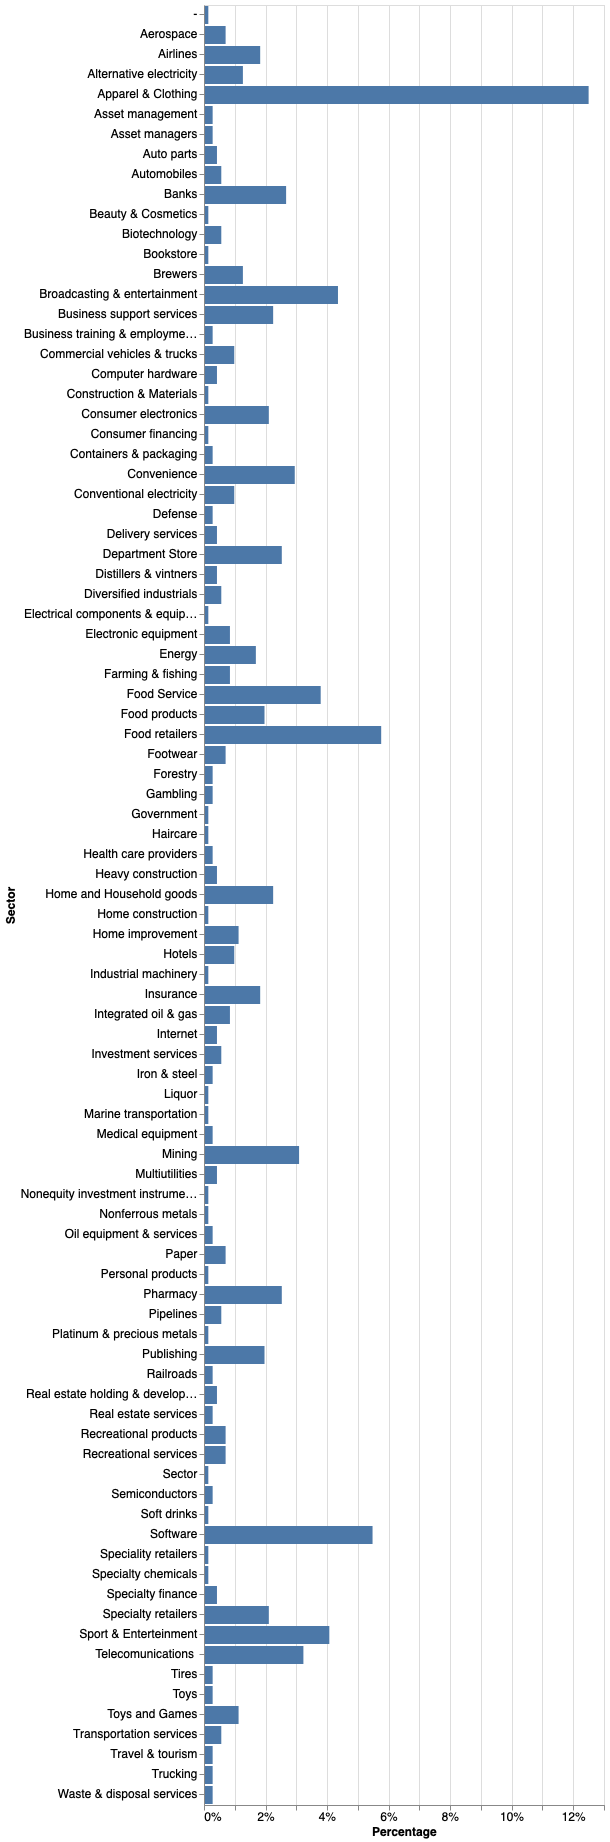

In [14]:
category_plot(master_list_df, col_name ='Sector')

In [12]:
alt.__version__

'3.2.0'

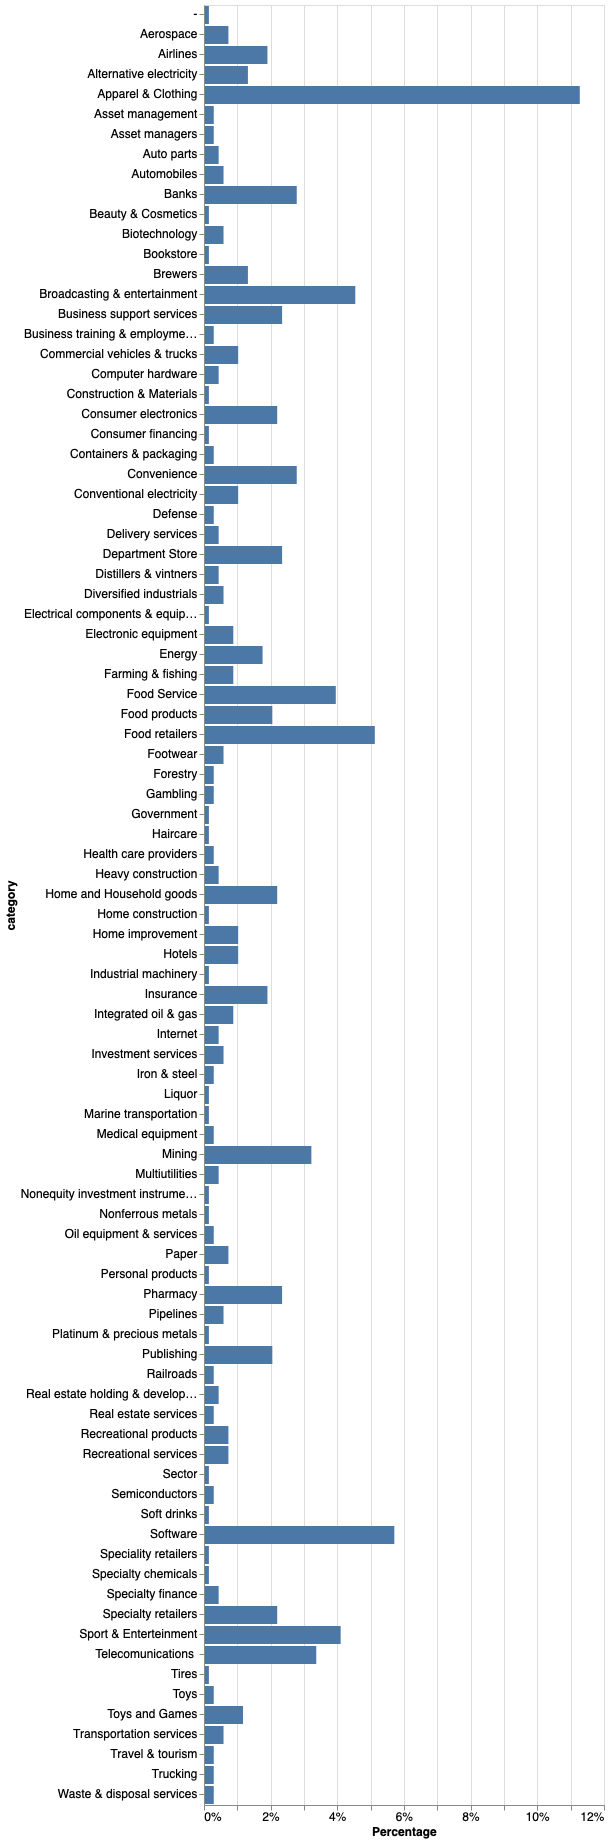

In [15]:
master_list_df1 = prepare_master_list(master_list_df, entity_name ='Store', sector_name ='Sector')
#master_list_df1.head(1)
category_plot(master_list_df1)

In [ ]:
# Explore df for key words
master_list_df1[master_list_df1['category'].str.contains('Automobile')]

In [ ]:
# Explore df for key words
master_list_df1[master_list_df1['entity'].str.contains('mexx')]

In [ ]:
# Merge Categories using a dictionary

group_dict = {"Toys":"Toys and Games", 
              "Haircare": "Beauty & Cosmetics", 
              "Conventional electricity": "Energy", 
              "Pharmacy" : "Convenience", 
              "Apparel & Clothing": "Clothing & Footwear",
              "Footwear": "Clothing & Footwear",
              "Food retailers": "Food-Convenience-Pharmacy",
              "Convenience" : "Food-Convenience-Pharmacy"
             }
df3 = master_list_df1.copy()
df3.loc[df3.category.isin(group_dict.keys()), "category"] = df3.loc[df3.category.isin(group_dict.keys()), "category"].map(group_dict)

category_plot(df3)

In [ ]:
df3.head(2)

In [ ]:
# Write CSV File
out_df = df3
file_path = "../../data/input/feature_extraction"
file_name = "master_list_sectors2"
write_csv(out_df, file_name, file_path)

### Company List for Food-Convenience-Pharmacy

In [ ]:
food_conv_pharm_list = df3[df3['category'].str.contains('Food-Convenience-Pharmacy')]['entity'].to_list()
fcp_list = supermarket_df['Supermarket_retailers'].to_list() + food_conv_pharm_list
fcp_df = pd.DataFrame({'fcp_retailers': fcp_list})

In [ ]:
### Write CSV file w/o loosing special characters

In [ ]:
# Write CSV function
def write_csv(df, file_name="file_name", file_path= "../../data/input/feature_extraction", out_sys = "win"):
    '''
    '''
    
    ouput_path_name = file_path+'/'+file_name
    
    if out_sys == "win":
    # For windows systems
        csv_file = df.to_csv(ouput_path_name+'.csv', encoding='utf-8-sig', index=False)
    elif out_sys == "macsss":
    # For mac systems
        csv_file = df.to_csv(ouput_path_name+'.csv', encoding="utf-8", index=False)
    
    print("Exported CSV file to {} \n".format(ouput_path_name+'.csv'))


In [ ]:
out_df = fcp_df 
file_name = "food_convenience_pharmacy"
write_csv(out_df, file_name)

### Company List for Clothing and Footwear Retailers

In [ ]:
clothing_footwear_retailers = df3[df3['category'].str.contains('Clothing & Footwear')]['entity'].to_list()
consumer_electronics_retailers 

In [ ]:
clothing_footwear_df = pd.DataFrame({'cloth_foot_retailers': clothing_footwear_retailers})
export_file_name = "clothing_footwear_retailers"
write_csv(clothing_footwear_df, export_file_name)

### Company List for Consumer Electronics

In [ ]:
consumer_electronics_retailers = df3[df3['category'].str.contains('Consumer electronics')]['entity'].to_list()
consumer_electronics_retailers

In [ ]:
# Additional Sources
#https://www.howtosavemoney.ca/25-canadian-computer-and-electronics-stores-you-ve-never-heard-of
can_25_uncommon_ce_stores = ["NewEgg", "Dell", "The Source", "Memory Express", "Canada Computers", 
                            "Amazon Electronics", "Best Buy", "Staples", "DirectDial", "PC-Canada",
                            "My Teknology", "ShopRBC", "Visions Electronics", "SoftwareCity",
                            "PC Canada", "Infonec", "PCVOnline", "FrontierPC", "CenDirect", 
                             "Mike’s Computer Shop", "ITFactory", "Ashlin Technology Solutions","PCZone",
                             "BeDirect", "Apple Store"]

In [ ]:
# Merge and remove duplicates
consumer_electronics_retailers_1 = can_25_uncommon_ce_stores + consumer_electronics_retailers
consumer_electronics_retailers_1 = list(set(consumer_electronics_retailers_1))

In [ ]:
c_electronics_df = pd.DataFrame({'consumer_electronics_retailers': consumer_electronics_retailers_1})
export_file_name = "consumer_electronics_retailers"
write_csv(c_electronics_df, export_file_name)

### Company List for Automobile Dealership

In [ ]:
auto_retailers = df3[df3['category'].str.contains('Auto')]['entity'].to_list()
auto_retailers

In [ ]:
# Additional Sources
#https://autofile.ca/en-ca/auto-brand
#List of auto brands to be used as keys
#auto_brands_in_canada = pd.read_csv('../../data/input/feature_extraction/master_list_sectors1.csv')

In [ ]:
# Merge and remove duplicates
# automobile_dealers = can_25_uncommon_ce_stores + consumer_electronics_retailers
# consumer_electronics_retailers_1 = list(set(consumer_electronics_retailers_1))

In [ ]:
auto_dealers_df = pd.DataFrame({'auto_dealers': auto_retailers})
export_file_name = "auto_dealers"
write_csv(c_electronics_df, export_file_name)

In [ ]:
!pwd

 ## Manipulate Resume Info

In [ ]:
resume_info.columns = resume_info.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
resume_info.head(1)

In [ ]:
# Step 0 Clean Text function
def clean_c_name(text):
    
    text = str(text)
    text = str(text.split('/')[0])
    text = str(text.split(',')[0])
    #text = str(text.split('(')[0])
    
    # Replace a sequence of whitespaces by a single whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove other strange characters
    text = re.sub(r'''[\*\~]+''', "", text)
    
    # Remove '.' from last place
    if text.endswith('.'):
        text= text[:-1]
        
    # Remove ' ' space from 1st place
    if text.startswith(' '):
        text= text[1:]
    
    text_out = text
    
    return text_out 

In [ ]:
# STEP_1 Prepare df function
def prepare_df2(df, col_name_out ='retail_new_name', col_name_in ='retail_name'):
    '''
    '''
    
    # Remove empty lines
    #df = df.dropna()
    
    # Remove duplicates
    #df = df.drop_duplicates(subset=None, keep='first', inplace=False)
    
    # Reset_Index
    df = df.reset_index().drop('index',1)
    
    # Clean names
    df[col_name_out] = df[col_name_in].apply(clean_c_name)
    df[col_name_out] = df[col_name_out].str.strip().str.lower().str.replace('(', '').str.replace(')', '').str.replace(',','')
    
    # Sort df
    df.sort_values(by=[col_name_in], ascending=True)
    
    return df 

In [ ]:
# Compare companies list and generate similarity index and flag based on cutoff

def gen_flag2(input_list, ref_list, out_name = 'ms_retailer', flag_name = 'f_retail', threshold = 0.7):
    '''
    '''
    
    code_list = code_list.to_list()
    
    # Check inputs are ok for processing
    
    if type(input_list) == 'pandas.core.series.Series':
        input_list = input_list.to_list()
        
    if type(input_list) == 'list':
        input_list = input_list
    
    if type(ref_list) == 'pandas.core.series.Series':
        input_list = input_list.to_list()
        
    if type(ref_list) == 'list':
        input_list = input_list
    
    compare_dict = {}
    pairs = []

    # for company in input_list[0:5]:
    for company in input_list:

        similar_dict = {}
        compare_dict.setdefault(company,[]).append(similar_dict)
        
    #     for retailer in ref_list[0:5]:
        for retailer in ref_list:  

            pair = (company,retailer)
            pairs.append(pair)

    # Calculate similarity - Levenshtein Distance - also know as edit distance 
    # The return value is a float between 0 and 1, where 0 means totally different, and 1 equal.

            similarity = textdistance.levenshtein.normalized_similarity(company, retailer)

            similar_dict.setdefault(retailer,[]).append(similarity)

    # Get the most similar (maximum similarity index)
    most_similar_dict={}

    for company, compare in compare_dict.items():

        most_similar = [{k:round(v[0],4)} for k,v in compare[0].items() if v==max(compare[0].values())][0]
        
        [[ms_retailer, ms_retail_index]] = most_similar.items()

        most_similar_dict.setdefault("company",[]).append(company)
        most_similar_dict.setdefault(out_name,[]).append(ms_retailer)
        most_similar_dict.setdefault("ms_index",[]).append(ms_retail_index)
        

    # Calculate retail flag
        if ms_retail_index >= threshold:
            retail_flag = int(1)
        else:
            retail_flag = int(0)

        most_similar_dict.setdefault(flag_name,[]).append(retail_flag)

    # Results
    similar_df = pd.DataFrame(most_similar_dict)
    
    return similar_df

In [ ]:
# Classification WORKFLOW for Extracted Data Template

# 1 load data

# Company data
resume_info = pd.read_csv('../../data/input/feature_extraction/manual_extraction_template.csv')
# List of food_service_retailers
foodservice_df = pd.read_csv('../../data/input/feature_extraction/food_retail_list.csv')
# list of retailers
retailers_df = pd.read_csv('../../data/input/feature_extraction/retail_list.csv')


# Food service Lists

additional_list = ['a & w', 'a&w', 'chuck e. cheese', 'wendy', "wendy's", 'touchdown willies', 
                   "touchdown willy's tap & grill", 'tony roma’s fallsview', 'tony roma’s', "denny's", 
                   'denneys', 'hard rock cafe', 'hard rock café', 'pickle barrel', 'hummingbird pub', 
                   'starbucks', 'the london club', 'the nutty chocolatier', 'wild wings', 'forrat’s lounge', 
                   'costa blanca', 'harveys & swiss chalet', "tucker's market place", 'bier markt', 'blco foods', 
                   'hard rock cafe']

keyword_list = ["restaurant","pizza", "steak", "burger", "grill", "dry bar", "coffee", "donald", "taco", 
                            "catering", "burrito", "snack", "cafe", "pretzels", "mexican", "sweet", "coffee shop",
                            "cuisine", "cafeteria", "chocolat", "chicken"]

keyword_exception_list = [""]

#----------------------------------------------FOR LOOP SECTION--------------------------------------------------------#

#for i in range(1,3):
for i in range(1,2):
    col_num = i
    
# 2 Get work data from resume info dataframe by column into a DF form
    col_name_in = str("work"+str(col_num)+"_company")
    input_company_df = resume_info[[col_name_in]].copy()
    
# 3 Clean text data for comparison
    company_df = prepare_df(input_company_df, col_name_out ='company', col_name_in = col_name_in)
    foodserving_df = prepare_df(foodservice_df, col_name_out ='foodserving_retailer', col_name_in ='restaurant_retailers')
    
# 4 Generate Initial entity flag    
    similar_foodserving_df = gen_flag2(company_df['company'], 
                                      foodserving_df['foodserving_retailer'], 
                                      out_name = 'ms_retailer', 
                                      flag_name = 'food_serving', 
                                      threshold = 0.8)    
    
# 5 Find associated keywords and list results into a df
    keyword_dict={}
    for item in keyword_list:
        result_list = similar_foodserving_df[similar_foodserving_df['company'].str.contains(item)]['company'].to_list()
        keyword_dict.setdefault("keyword",[]).append(item)
        keyword_dict.setdefault("matched_results",[]).append(result_list)
    keyword_df = pd.DataFrame(keyword_dict)
    
# 6 Create edited restaurant list

    foodserving_df1 = foodserving_df.copy() ###### CHANGE THIS FOR FUNCTION

    keyword_input_list = keyword_df['matched_results'].to_list()
    keyword_lists = [item for item in keyword_input_list if item not in keyword_exception_list]

    # Update list using keyword list
    for single_list in keyword_input_lists:
        newRow = single_list 
        foodserving_df1 = foodserving_df1.append(pd.DataFrame(newRow, 
                                                             columns=['foodserving_retailer']), ignore_index=True)

    # Update list with additional entities
    newRow = additional_list
    foodserving_df1 = foodserving_df1.append(pd.DataFrame(newRow, 
                                                         columns=['foodserving_retailer']), ignore_index=True)
    # Remove Duplicates
    foodserving_df1 = foodserving_df1.drop_duplicates(subset='foodserving_retailer', keep='first', inplace=False)
        
# 7 Generate Final entity flag   
    similar_foodserving_df = gen_flag2(company_df['company'], 
                                      foodserving_df1['foodserving_retailer'], 
                                      out_name = 'ms_retailer', 
                                      flag_name = 'food_serving', 
                                      threshold = 0.8)
    



In [ ]:
#resume_info

In [ ]:
# 1 load data

# Company data
resume_info = pd.read_csv('../../data/input/feature_extraction/manual_extraction_template.csv')
# List of food_service_retailers
foodservice_df = pd.read_csv('../../data/input/feature_extraction/food_retail_list.csv')
# list of retailers
retailers_df = pd.read_csv('../../data/input/feature_extraction/retail_list.csv')

In [ ]:
foodservice_df.head(1)
#foodservice_df.columns[0]

In [ ]:
# Food service Lists

foodserving_key_list = ["restaurant","pizza", "steak", "burger", "grill", "dry bar", "coffee", "donald", "taco", 
                                "catering", "burrito", "snack", "cafe", "pretzels", "mexican", "sweet", "coffee shop",
                                "cuisine", "cafeteria", "chocolat", "chicken"]

foodserving_user_list = ['a & w', 'a&w', 'chuck e. cheese', 'wendy', "wendy's", 'touchdown willies', 
                       "touchdown willy's tap & grill", 'tony roma’s fallsview', 'tony roma’s', "denny's", 
                       'denneys', 'hard rock cafe', 'hard rock café', 'pickle barrel', 'hummingbird pub', 
                       'starbucks', 'the london club', 'the nutty chocolatier', 'wild wings', 'forrat’s lounge', 
                       'costa blanca', 'harveys & swiss chalet', "tucker's market place", 'bier markt', 'blco foods', 
                       'hard rock cafe']
keyword_exception_list = []

In [ ]:
# Classification WORKFLOW for Extracted Data Template

#reference_df = foodservice_df

def retail_flag(i,
                input_df,
                reference_df,
                keyword_list=[],
                user_list=[],
                keyword_exeption_list=[],
                category_name="foodserving",
                cat_flagname="food_serving",
                similar_threshold=0.8):
    '''
    '''

    
# 2 Get work data from resume info dataframe by column into a DF form
    col_num = i
    col_name_in = str("work"+str(col_num)+"_company")
    input_company_df = input_df[["employee_code", col_name_in]].copy()
    
# 3 Clean text data for comparison
    company_df = prepare_df2(input_company_df, col_name_out ='company', col_name_in = col_name_in)
    
    retail_df = prepare_df2(reference_df, col_name_out = category_name+'_retailer', col_name_in=reference_df.columns[0])
    
    # Create dictionary for employee name and store code from df2
    company_dict = pd.Series(company_df["work"+str(col_num)+"_company"].values, index=company_df["company"]).to_dict()
    
# 4 Generate Initial entity flag    
    similar_retail_df = gen_flag(company_df['company'],
                                      retail_df[category_name+'_retailer'], 
                                      out_name = 'ms_retailer', 
                                      flag_name = cat_flagname, 
                                      threshold = similar_threshold)    
    
# 5 Find associated keywords and list results into a df
    keyword_dict={}
    for item in keyword_list:
        result_list = similar_retail_df[similar_retail_df['company'].str.contains(item)]['company'].to_list()
        keyword_dict.setdefault("keyword",[]).append(item)
        keyword_dict.setdefault("matched_results",[]).append(result_list)
    keyword_df = pd.DataFrame(keyword_dict)
    
# 6 Create edited restaurant list

    retail_df1 = retail_df.copy() ###### CHANGE THIS FOR FUNCTION

    keyword_input_list = keyword_df['matched_results'].to_list()
    keyword_list = [item for item in keyword_input_list if item not in keyword_exception_list]

    # Update list using keyword list
    for single_list in keyword_input_list:
        newRow = single_list
        retail_df1 = retail_df1.append(pd.DataFrame(newRow, 
                                                             columns=[category_name+'_retailer']), ignore_index=True)

    # Update list with additional entities
    newRow = user_list
    retail_df1 = retail_df1.append(pd.DataFrame(newRow, 
                                                         columns=[category_name+'_retailer']), ignore_index=True)
    # Remove Duplicates
    retail_df1 = retail_df1.drop_duplicates(subset=category_name+'_retailer', keep='first', inplace=False)
        
# 7 Generate Final entity flag   
    similar_retail_df1 = gen_flag(company_df['company'], 
                                      retail_df1[category_name+'_retailer'], 
                                      out_name = 'ms_retailer', 
                                      flag_name = cat_flagname, 
                                      threshold = similar_threshold)
    
    # Add employee code to similar_retail_df 
    #df1 = similar_retail_df1
    #df1.loc[df1.company.isin(company_dict.keys()), "work"+str(col_num)+"_company"] = df1.loc[df1.company.isin(company_dict.keys()),'company'].map(company_dict)
    
    # Create food service dict
    df1 = similar_retail_df1
    retail_dict = pd.Series(df1[cat_flagname].values, index=df1['company']).to_dict()
    

# 8 Write results to dataframe  
#     #input_df["food_service"+str(col_num)] = input_df["work"+str(col_num)+"_company"]#.apply(preprocess)
#     input_df["food_service"+str(col_num)] = similar_retail_df['food_serving'].astype('int64')

    df2 = input_df
    df2['company'] = company_df['company']

    df2.loc[df2.company.isin(retail_dict.keys()), cat_flagname+str(col_num)] = df2.loc[df2.company.isin(retail_dict.keys()), "company"].map(retail_dict)
    del df2['company']
    
    return df2

In [ ]:
for i in range(1,7+1):
    df = retail_flag(i,
                resume_info,
                foodservice_df,
                keyword_list=foodserving_key_list,
                user_list=foodserving_user_list,
                keyword_exeption_list=[],
                category_name="foodserving",
                cat_flagname="food_serving",
                similar_threshold=0.8)
df

In [ ]:
#  Food-Convenience-Pharmacy  Lists

fcp_list = supermarket_df['Supermarket_retailers'].to_list() + food_conv_pharm_list
fcp_df = pd.DataFrame({'fcp_retailers': fcp_list})

fcp_key_list = ['market', 'food' , 'drug']

fcp_user_list = ['walmart supercentre', 'walmart canada corp', 'walmart super center', 'walmart', 'ancaster walmart supercentre', 
                'aisle 24', 'avondale stores', 'circke k', 'couche-tard', 'provi-soir', 'hasty market', 'irving blue canoe', 
                'irving mainway', 'needs convenience', 'olco', 'on the run', 'pioneer', 'quickie convenience stores', '7-eleven', 
                "becker's", "mac's convenience stores", 'dollarama', 'mac’s convenience store calgary']

keyword_exception_list = []

In [ ]:
for i in range(1,7+1):
    df1 = retail_flag(i,
                df,
                fcp_df,
                keyword_list=fcp_key_list,
                user_list=fcp_user_list,
                keyword_exeption_list=[],
                category_name="food_conv_phar",
                cat_flagname="food_conv_phar",
                similar_threshold=0.85)
df1

In [ ]:
# Apply classification function to work columns
for i in range(1,7):
    col_num = i
    resume_info["food_service"+str(col_num)] = resume_info["work"+str(col_num)+"_company"]#.apply(preprocess)
resume_info.head(1)

In [ ]:
#resume_info["work1_company"] = extract["work1_company"].astype("string")

In [ ]:
# for company, compare in compare_dict.items():
#     most_similar = [{k:round(v[0],4)} for k,v in compare[0].items() if v==max(compare[0].values())][0]
#     print(most_similar.keys().get)

In [ ]:
# for similar in final_dict.values():
#     #print(similar)
#     most_similar = [{k:v[0]} for k,v in similar[0].items() if v==max(similar[0].values())][0]    
#     print(most_similar)  
#     print("----")
    

In [ ]:
# test_dict = {'abc fine wine & spirits': [0.17391304347826086], 'acme comics & collectibles': [0.11538461538461542], 'alaska commercial company': [0.19999999999999996], 'alfred angelo': [0.23076923076923073], 'alife rivington club': [0.25]}

# most_similar = [{k:v[0]} for k,v in test_dict.items() if v==max(test_dict.values())][0]    
# most_similar

In [ ]:
# url = 'abcdc.'
# if url.endswith('.'):
#     url = url[:-1]
# url    

In [ ]:
# s = 'WidgetCo, Inc.'
# s.replace(',','')

In [ ]:
# text_list = ['walmart Supercenter', 'walmart super center', 'walmart canada', 'walMart', 'WALlmart','WALMART CAnada']
# for subject in text_list:
#     result = re.sub(r"(?i)\Awal(?:lmart|mart(?: (?:Canada|Super(?: ?center)))?)\Z", "walmart", subject)
#     print(result)

In [25]:
# 1 Mobile Competitor
mobile_user = ["freedom", "koodo", "shaw", "telus", "bell", "rogers", "the mobile shop", "best buy", "bestbuy" 
               "videotron", "wow", "mobile", "the source", "walmart", "glentel", "fido",
               'vidéotron', 'multi carrier dealer']

kw_mobile = ["cellular", "wireless", "fone", "phone"]

kw_mob = mobile_user + kw_mobile

# Food Services (Restaurants and Fastfood)
kw_food = ["restaurant","pizza", "steak", "burger", "grill", "dry bar", "coffee", "donald", "taco", 
            "catering", "burrito", "snack", "cafe", "pretzels", "mexican", "sweet", "coffee shop",
            "cuisine", "cafeteria", "chocolat", "chicken", "hard rock", "pita",'subs', 'popeyes']

fs_user = ['a & w', 'a&w', 'chuck e. cheese', 'wendy', "wendy's", 'touchdown willies', 
           "touchdown willy's tap & grill", 'tony roma’s fallsview', 'tony roma’s', "denny's", 
           'denneys', 'hard rock cafe', 'hard rock café', 'pickle barrel', 'hummingbird pub', 
           'starbucks', 'the london club', 'the nutty chocolatier', 'wild wings', 'forrat’s lounge', 
           'costa blanca', 'harveys & swiss chalet', "tucker's market place", 'bier markt', 
           'blco foods',"freshly squeezed", "tim hortons", 'subway','chuck e cheese', 'moose jaw snow hut',
           'jack astor’s', 'wood35', 'the keg', 'earl']

# Food Retailers+Convenience Stores+Pharmacy (fcp)

# Quick Service =  Fast-food here in Canada
gas_station_retail = ['shell', 'esso', 'petro canada', 'canadian tire', 'husky market', 'chevron gas station' ]

kw_fcp1 = ['market', 'food' , 'drug', "wholesale", 'whole sale' "walmart", "loblaw", "target", "pharma",
           'dollar store']
#maybe => store

kw_fcp = gas_station_retail + kw_fcp1

fcp_user = ['walmart supercentre', 'walmart canada corp', 'walmart super center', 'walmart', 'ancaster walmart supercentre', 
            'aisle 24', 'avondale stores', 'circke k', 'couche-tard', 'provi-soir', 'hasty market', 'irving blue canoe', 
            'irving mainway', 'needs convenience', 'olco', 'on the run', 'pioneer', 'quickie convenience stores', '7eleven', 
            "becker's", "mac's convenience stores", 'dollarama', 'mac’s convenience store calgary'
           "loblaw superstore",'convenience', 'tesco stores', 'safeway', 'costco', "tri mart express"]

# Consumer Electronics
kw_celec = ['computer', 'cellular', "mobile", "fone", "phone", "lids", "wear", "electronic",'samsung', 'amazon',
            'virgin media', 'electronic boutique']

celec_user = ["sony", "pc world", "dyson", "walmart", "fido", "teleco", "futureshop", 'future shop', 'iworld connect']

# Car Dealerships
kw_auto = ['saab', 'lamborghini', 'buick', 'nissan', 'jeep', 'ram', 'jaguar', 'scion', 'citroen', 'shelby', 'land rover', 
           'infiniti', 'general motors', 'bentley', 'mini', 'gmc', 'lynk co', 'rolls-royce', 'panoz', 'ferrari', 
           'chevrolet', 'lincoln', 'mazda', 'srt', 'dodge', 'alfa romeo', 'mclaren', 'car sales', 'fisker', 
           'fiat', 'cadillac', 'suzuki', 'karma', 'bugatti', 'lexus', 'tesla', 'ford', 'pontiac',
           'acura', 'hyundai', 'bmw', 'qoros', 'volvo', 'volkswagen', 'aston martin', 'chrysler', 'maserati',
           'polestar', 'porsche', 'lotus', 'mercedes–benz', 'honda', 'subaru', 'detroit electric', 'kia', 'toyota', 
           'dealership', 'mitsubishi', 'mg','automotive', 'mercedesbenz', 'go auto','canada drives', 'beta auto',
           'quality cars', 'cars']

#auto_user = ['smart','audi']

# Blue Colar (Manual Labor)
kw_bcolar = ["plumb", "restoration", "repair", "land scaping", "concrete", "finishing", "mansory", "lawn", "roof", 
             "mason", "landscaping", "ground-keeping", "installation", "carpent", "lawncare", "cleaning", 
             "home improvement", "public transit", "pool clean", "mantain", "moving co", 'movers',
             'movoing', 'labourer']
# Healthcare
kw_health = ["healthcare", "therap", "transplant", "medicine", "medical", "diagnostic", 'health centre',
             'health center', "hospital", "dental", "massage", "accupunture", "orthodont", "doctor", "autism",
            'family practice', 'clinic', 'vision']

# Sport+Travel+Entertainment+Hoteling
kw_steh = ["club", "theater", "theatre", "sport", "goodlife", "fit", "fitness", "gym", "cine", 
           "speed", "hotel", "resort", "inn", "hilton", "howard", "holliday", "travel", 'drinksmart',
           "suites", 'karaoke', 'best western','waterpark', 'tour','hometel','lodge', 'wonderland'
          'polarpak']

kw_pcem = ["consulting", "professional", "attorney", "integrated solutions", "engineering",
          'integrated staffing', 'customer solution', "business developers", 
          "industrial developement", 'solutions', 'contemporary security canada', "h&r block", 
          'tax preparation']

# Clothing+Footwear
kw_cfwear = ['fashion', 'footwear', "foot", "boot", "apparel", "lids", "wear", "shoe",
             'clothing store', 'clothing']

cfwear_user = ["eagle outfitters", "bootlegger", "champsports", "champ sports", "browns", "fossil", "footlocker",
               "clothier", "nike", "levi's & Co", "lids", "mexx", "addidas", "puma",
               'fossil', 'envy', 'geox','tommy hilfiger', 'levis &co', 'american eagle', 
              'the blue jays shop', 'holister']

cfwear = kw_cfwear + cfwear_user

# Banks
kw_banks = ["bank", 'bmo', 'cibc', 'rbc','rbc royal bank', 'td canada', 'scotiabank', 'bank of',
            'funds','trust', 'securities', 'financial', 'td insurance', 'trade', 'card services', 'broker', 
            'wells fargo', 'citibank']
# other possible => bank_name + ['bank', 'trust', 'insurance', 'invest', 'capital']

kw_bty = ['hair','hair design','spa', 'jewler', 'cosmetics', 'perfumes', 'salon and spa', 'salon', 'sephora', 
          'hair salon', 'barbershop', 'jewelry', 'jewel', 'bath & body works', 'lash studio', 'la naturess', 
         'souvenirs and gifts', "davids tea", "estée lauder"]


# No coded yet

# other possible => bank_name + ['bank', 'trust', 'insurance', 'invest', 'capital']

kw_government = ["city of", "federal", 'mint', 'public', 'canada post', "hmcs ontario", 'police'
                'canada revenue agency']

education_training = ['university', 'college', 'school', 'academy', 'elementary school', 'preparatory school', 
                     'education ']

child_lterm_care = ['retirement home', 'keepers', 'children', 'living', 'community', 'day care', 'long term care',
                   'senior house', '5 rivers youth', 'garderie le petit voilier', 'connor homes','easy home', 
                   'hospice']

house_goods = ['home depot', 'sears', 'bath & body works', 'the brick', 'home lighting factory outlet',
               'king furniture', 'furniture']

airlines = ['qatar airways', 'westjet']

realtor = ["remax", ]

energy = ["direct energy", "gas agency"]

electronic_repair = ['buy n cell', 'buyncell', 'ubreakifix']

car_rental = ['budget truck and car rental']





In [ ]:
def company_industry_label_generator2(comp_name,store_list,store_sector,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,score_threshold = 0.80):
    company_name = clean_txt_f(str(comp_name))
    myDict = dict()
    search_1 = lookup_similar(company_name,store_list)
    if search_1[0]>score_threshold:
        myDict["industry"] = store_sector[search_1[2]]
        myDict["method"] = 'master_list'
        myDict["company_matched"] = search_1[1]
        myDict["similarity_score"] = search_1[0]
        return myDict
    elif any(kw in company_name for kw in l1):
#         myDict["industry"] = "Mobile Industry"
        myDict["industry"] = "Telecomunications "
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l2):
        myDict["industry"] = "Food Service"
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l3):
        myDict["industry"] = "Food-Convenience-Pharmacy"
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l4):
        myDict["industry"] = "Consumer electronics"
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l8):
        myDict["industry"] = "Sport_Travel_Enterntain_Hotel"
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l5):
        myDict["industry"] = "Car Dealers"
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l6):
        myDict["industry"] = "Blue Collar"
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l7):
        myDict["industry"] = "Healthcare"
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l9):
        myDict["industry"] = "Profesional_Services"
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    #User list Section
    elif any(kw in company_name for kw in l10):
        myDict["industry"] = "Food Service"
        myDict["method"] = 'user'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l11):
        myDict["industry"] = "Food-Convenience-Pharmacy"
        myDict["method"] = 'user'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l12):
        myDict["industry"] = "Consumer electronics"
        myDict["method"] = 'user'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l13):
        myDict["industry"] = "Clothing & Footwear"
        myDict["method"] = 'user'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l14):
        myDict["industry"] = "Banks"
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    elif any(kw in company_name for kw in l15):
        myDict["industry"] = "Beauty & Vanity"
        myDict["method"] = 'keyword'
        myDict["company_matched"] = "NA_Keyword"
        myDict["similarity_score"] = 1
        return myDict
    else:
        myDict["industry"] = "unknown"
        myDict["method"] = 'not_matched'
        myDict["company_matched"] = "not_matched"
        myDict["similarity_score"] = 0
        return myDict